In [7]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from matplotlib.patches import Rectangle
data = pd.read_csv("Data/Cafeteria_2_results.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

,frame.number,frame.time_relative,frame.len,wlan_radio.phy,wlan_radio.frequency,wlan_radio.signal_dbm,wlan_radio.data_rate,wlan_radio.duration,wlan.fc.type_subtype,wlan.fc.type,wlan.fc.subtype,wlan.duration,wlan.fc.ds,wlan.fc.retry,wlan.fcs.status,wlan.qos.priority,data.len
0,1,0.000000,283,6,2432,-72.0,24.0,104,8,0,8,0,0x00000000,0,1.0,NaN,NaN
1,2,0.049341,300,6,2432,-73.0,24.0,112,8,0,8,0,0x00000000,0,1.0,NaN,NaN
2,3,0.098297,263,6,2432,-73.0,24.0,100,8,0,8,0,0x00000000,0,1.0,NaN,NaN
3,4,0.145634,274,6,2432,-72.0,24.0,104,5,0,5,44,0x00000000,1,1.0,NaN,NaN
4,5,0.145651,274,6,2432,-71.0,24.0,104,5,0,5,44,0x00000000,1,1.0,NaN,NaN


In [8]:
print('The number of frames that were captured: ', data['frame.number'].count(), ' frames')
print('The largest frame that was captured: ', data['frame.len'].max(), ' bytes')
print('The smallest frame that was captured: ', data['frame.len'].min(), ' bytes')
print('The lowest radio signal strength: ', data['wlan_radio.signal_dbm'].max(),' dBm')
print('The highest radio signal strength: ', data['wlan_radio.signal_dbm'].min(),' dBm')

The number of frames that were captured:  290249  frames
The largest frame that was captured:  4064  bytes
The smallest frame that was captured:  48  bytes
The lowest radio signal strength:  -22.0  dBm
The highest radio signal strength:  -99.0  dBm


In [43]:
direction = []

for x in data['wlan.fc.ds'].value_counts().sort_index():
    direction.append(x/data['frame.number'].count()*100)
if len(direction) != 4:
    direction.append(0)
print(direction)

[77.66951824123424, 9.006404845494732, 13.25172524280876, 0.07235167046225827]


In [45]:
#Which direction does the data flow (number of Packets)?
data['wlan.fc.ds'].value_counts().sort_index()

0x00000000    225435
0x00000001     26141
0x00000002     38463
0x00000003       210
Name: wlan.fc.ds, dtype: int64

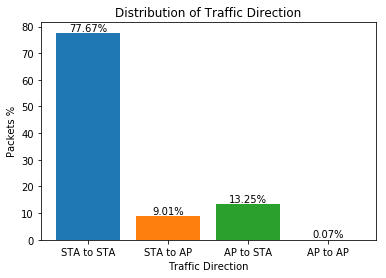

In [47]:
#Plot the distribution:
ftypes = ['STA to STA','STA to AP','AP to STA','AP to AP']
pos = np.arange(len(ftypes))
#data.groupby('wlan.fc.ds')['frame.number'].nunique().plot(kind='bar')
rect1 = plt.bar(x=pos,height=direction, width=0.8, align='center', color=['#1F77B4','#FF7F0E','#2CA02C','#D62728'])
plt.title("Distribution of Traffic Direction")
plt.xlabel("Traffic Direction")
plt.ylabel("Packets %")
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%0.2f%%' % (height),
                ha='center', va='bottom')
autolabel(rect1)
plt.xticks(pos,ftypes,rotation=0)
plt.show()


In [49]:
# How many Packets are there for each Frame Type?
data['wlan.fc.type'].value_counts().sort_index()

0     64934
1    160439
2     64852
3        24
Name: wlan.fc.type, dtype: int64

In [50]:
types = list(data['wlan.fc.type'].value_counts().sort_index())
print(types)
types = (types/data['frame.number'].count())*100
print(types)

[64934, 160439, 64852, 24]
[2.23718256e+01 5.52763317e+01 2.23435740e+01 8.26876234e-03]


<IPython.core.display.Javascript object>


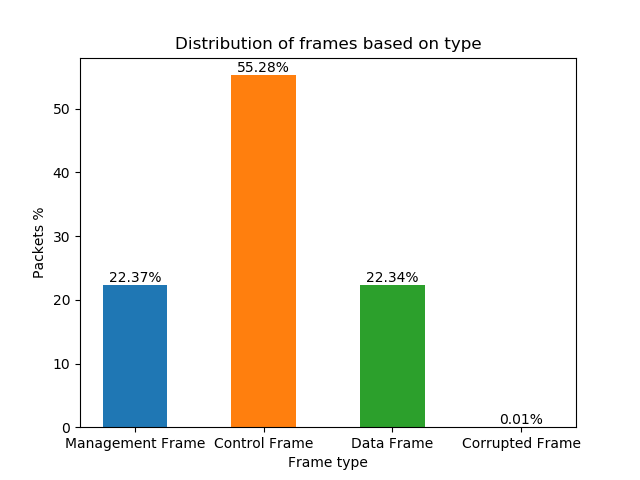

In [72]:

#Plot the distribution:
ftypes = ['Management Frame','Control Frame','Data Frame','Corrupted Frame']
pos = np.arange(len(ftypes))
#data.groupby('wlan.fc.type')['frame.number'].nunique().plot(kind='bar')
rect2 = plt.bar(x=pos, height=types, width=0.5, align='center', color=['#1F77B4','#FF7F0E','#2CA02C','#D62728'])
plt.title("Distribution of frames based on type")
plt.xlabel("Frame type")
plt.ylabel("Packets %")
autolabel(rect2)
plt.xticks(pos,ftypes,rotation=0)
plt.show()


In [144]:
# How many Packets are there for each SubFrame Type?
#data.groupby('wlan.fc.type')['wlan.fc.subtype'].value_counts().sort_index()
df0 = data[(data['wlan.fc.type'] == 0)]
df1 = data[(data['wlan.fc.type'] == 1)]
df2 = data[(data['wlan.fc.type'] == 2)]
sub0 = df0['wlan.fc.subtype'].value_counts().sort_index()
sub1 = df1['wlan.fc.subtype'].value_counts().sort_index()
sub2 = df2['wlan.fc.subtype'].value_counts().sort_index()


In [145]:
subtypes = list(data.groupby('wlan.fc.type')['wlan.fc.subtype'].value_counts().sort_index())
subtypes = (subtypes/data['frame.number'].count())*100
print(subtypes)

[7.92423057e-03 1.72265882e-03 4.82344470e-03 4.13438117e-03
 1.65134075e+00 1.70388184e+01 3.47219112e+00 1.06804847e-02
 2.03273741e-02 1.03359529e-02 1.49526786e-01 5.26100004e-01
 1.24310506e+01 1.60761966e+01 1.45530217e+01 1.13344060e+01
 3.55556781e-01 1.03359529e-01 2.29802687e+00 1.89444236e+01
 9.97763989e-01 6.89063528e-04 7.57969881e-03]


<IPython.core.display.Javascript object>


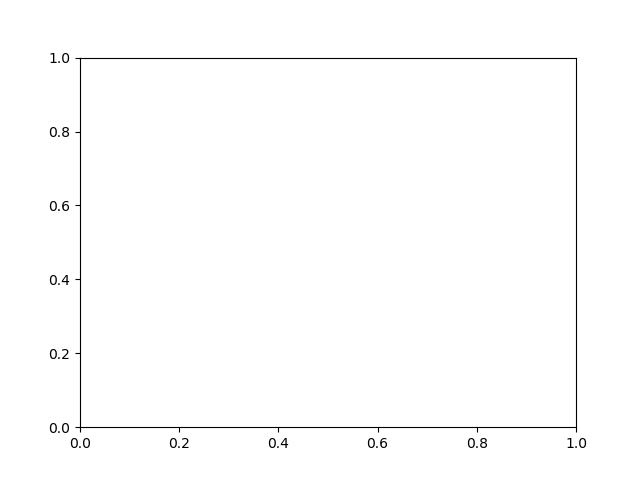

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [149]:
#Plot the distribution:
ftypes = ['Association Request','Probe Request','Probe Response','Beacon',
            'Annoucement Traffic Indication Map','Authentication','DeAuthentication','Action Frames','Control Frame End']

#data.groupby('wlan.fc.type')['wlan.fc.subtype'].value_counts().sort_index().unstack().plot(kind='bar',stacked=True)
#data.groupby('wlan.fc.type')['wlan.fc.subtype'].value_counts().sort_index().unstack().plot(kind='bar')
#data.groupby('wlan.fc.type')['wlan.fc.subtype'].value_counts().sort_index().plot(kind='bar')


pos = np.arange(15)

plt.bar(x=pos, height=sub0, width=0.8, align='center', color=['#1F77B4','#FF7F0E','#2CA02C','#D62728'])
plt.bar(x=pos+0.5, height=sub1, width=0.8, align='center', color=['#1F77B4','#FF7F0E','#2CA02C','#D62728'])
plt.bar(x=pos+1.5, height=sub2, width=0.8, align='center', color=['#1F77B4','#FF7F0E','#2CA02C','#D62728'])

plt.title("Distribution of frames on subtype")
plt.xlabel("Frame Subtype")
plt.ylabel("Number of Packets")
#plt.xticks(pos,ftypes,rotation=0)
plt.xticks(rotation=0,fontsize=5)
#plt.legend(ftypes,fontsize=7)
plt.show()



In [53]:
data['wlan.qos.priority'].value_counts().sort_index()

0.0    55980
1.0       32
2.0        2
3.0       10
5.0      135
6.0      687
7.0     1036
Name: wlan.qos.priority, dtype: int64

In [54]:
#What QoS does the data flows have?
qos=list(data['wlan.qos.priority'].value_counts().sort_index())
print(qos)
total_qos =sum(qos)
for x in range(len(qos)):
    qos[x] = (qos[x]/total_qos)*100
print(qos)

[55980, 32, 2, 10, 135, 687, 1036]
[96.71400435368508, 0.05528488994851594, 0.0034553056217822464, 0.017276528108911234, 0.23323312947030164, 1.1868974810822017, 1.7898483120832038]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

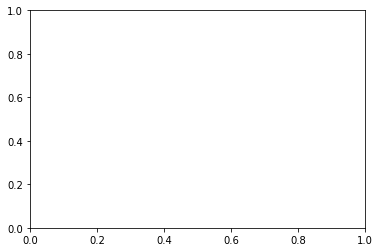

In [20]:

#Plot the distribution:
ftypes = ['Best Effort','Spare \n (Background)','Video \n (Controlled Load)','Video','Voice']
pos = np.arange(len(ftypes))
rects3 = plt.bar(x=pos, height=qos, width=0.5, align='center', color=['#17BECF','#1F77B4','#FF7F0E','#2CA02C','#D62728'])
plt.title("Distribution of QoS Traffic")
plt.xlabel("QoS Class")
plt.ylabel("Number of Packets")
plt.xticks(pos,ftypes,rotation=0, fontsize=8)

autolabel(rects3)
plt.show()

In [ ]:
#Max data transferred in a packet(bytes)
data['data.len'].max()

In [ ]:
#Min data transferred in a packet(bytes)
data['data.len'].min()

In [ ]:
#Plot the distribution of data length (bytes):
bin1 = [i for i in range(0,1000,10)]
data[['data.len']].plot(kind='hist',bins=bin1,rwidth=0.8)
plt.show()

In [ ]:
#Plot the distribution of data length (bytes):
bin1 = [i for i in range(0,1600,10)]
data[['data.len']].plot(kind='hist',bins=bin1,rwidth=0.8)
plt.show()

In [ ]:
data['data.len'].value_counts()

In [ ]:
#Packet Size over Time
plt.plot(data['frame.time_relative'], data['data.len'])

#bin1 = [i for i in range(0,1600,100)]
#data[['data.len']].plot(kind='hist',bins=bin1,rwidth=0.8)
plt.show()

In [ ]:
#Packet Size over Time
plt.scatter(data['wlan_radio.signal_dbm'], data['wlan_radio.data_rate'],marker='X',s=1**2)

#bin1 = [i for i in range(0,1600,100)]
#data[['data.len']].plot(kind='hist',bins=bin1,rwidth=0.8)
plt.show()

In [ ]:
data[['wlan_radio.signal_dbm']].plot(kind='bar')
plt.show()

In [165]:
data[(data['wlan_radio.signal_dbm'] > -60) & (data['wlan_radio.phy'] == 4)]['wlan_radio.data_rate']

57        1.0
112       1.0
114       1.0
164       1.0
166       1.0
207       1.0
208       1.0
238       1.0
240       1.0
254       1.0
260       1.0
269       1.0
277       1.0
284       1.0
421       1.0
423       1.0
495       1.0
497       1.0
581       1.0
583       1.0
587       1.0
607       1.0
718       1.0
720       1.0
1151      1.0
1153      1.0
1164      1.0
1282      1.0
1284      1.0
1304      1.0
         ... 
287683    1.0
287868    1.0
287871    1.0
287942    1.0
287943    1.0
287944    1.0
287946    1.0
288262    1.0
288264    1.0
288366    1.0
288376    1.0
288559    1.0
288836    1.0
288846    1.0
288998    1.0
289000    1.0
289124    1.0
289127    1.0
289177    1.0
289179    1.0
289370    1.0
289382    1.0
289549    1.0
289551    1.0
289555    1.0
289705    1.0
289721    1.0
289889    1.0
289891    1.0
290198    1.0
Name: wlan_radio.data_rate, Length: 2068, dtype: float64